# Models Pipeline

We want to see how different models affect our dataset.

In [1]:
from preprocessing import load_dataset, split_dataset, grid_search, interactions
from utilities import plot_grid_results
import models

We define the generic parameters, to be used to split the dataset.

In [2]:
test_size = 0.2         # the ratio of the dataset we want to use as test set
stratify = True         # Whether we want the split to keep the same proportion between classes as the original dataset
k = 5                   # The number of folds for the stratified k fold 

First of all, we load the dataset and we split it into training and test set (to be used only in the end).

In [3]:
# first, we load the dataset
X, y = load_dataset('./data/data.pkl')
# then, we split it
X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=test_size, stratify=stratify)

# generate the dataset version with interaction, with/without drop
X_tr_drop = interactions(X_tr, drop=True)
X_tr_int = interactions(X_tr, drop=False)

Now, we can start to try the grid search with different models, to see how it behaves.

Notice we want to have high __*recall*__ for class 'MATCH' (that is, we want to detect as many MATCH samples as possible). For this reason, we put recall as main metric for our grid search.

## K-Nearest Neighbors

We run a grid search on the kNN model, trying values of k from 1 to 10. Since our data is highly dimensional, we expect such an algorithm to perform bad.

### 1. No interactions, no PCA

In [4]:
# get pipeline 
pipe, grid = models.scaling(models.knn)
# call grid_search
out_knn = grid_search(X_tr, y_tr, pipe, grid, k)

print("Best model (according to recall): " + str(out_knn['best_params']))
print('-----------------------------------------')
print("Recall : " + str(out_knn['best_recall']))
print("Balanced accuracy: " + str(out_knn['best_balanced_accuracy']))
print("f1: " + str(out_knn['best_f1']))


Best model (according to recall): {'model__n_neighbors': 1}
-----------------------------------------
Recall : 0.701202375778647
Balanced accuracy: 0.8212448299615371
f1: 0.6951309684070098


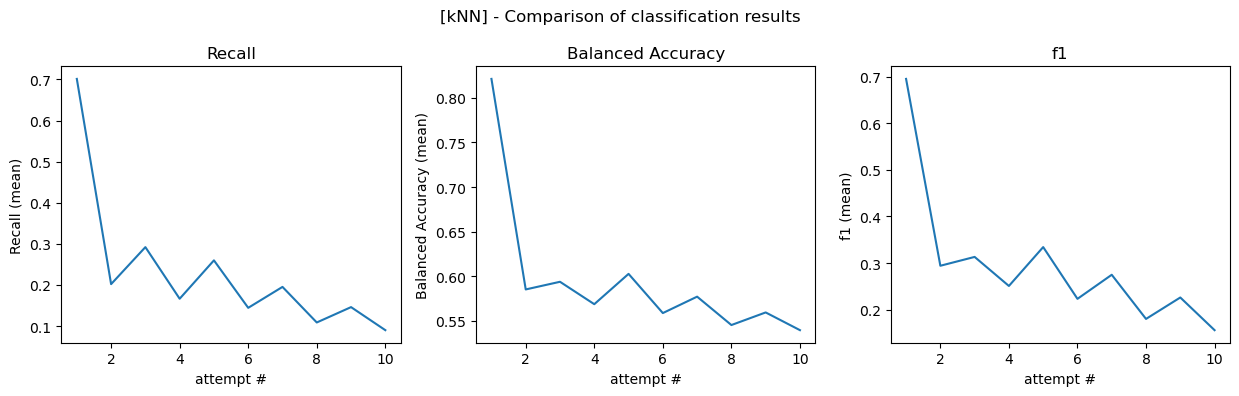

In [5]:
# Plot recall, balanced accuracy and f1 metric for every k in the range
plot_grid_results(out_knn, 'kNN')

### 2. Interactions, drop, PCA

In [7]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[25, 58], model_f = models.knn)
# call grid_search
out_knn = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print("Best model (according to recall): " + str(out_knn['best_params']))
print('-----------------------------------------')
print("Recall : " + str(out_knn['best_recall']))
print("Balanced accuracy: " + str(out_knn['best_balanced_accuracy']))
print("f1: " + str(out_knn['best_f1']))

Best model (according to recall): {'model__n_neighbors': 1, 'pca__n_components': 58}
-----------------------------------------
Recall : 0.7046646385629437
Balanced accuracy: 0.8267436222642033
f1: 0.7107557669499178


As expected, we get a really low performance. ...

## Logistic Regression

Normal Logistic Regression does not converge. We try some strategies to reduce the dimensionality of our data.

### 1. LR - with interation, drop, scaling



In [ ]:
# get pipeline 
pipe, grid = models.scaling(models.logistic_regression)
# call grid_search
out_lr_drop = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print("Best model (according to recall): " + str(out_lr_drop['best_params']))
print('-----------------------------------------')
print("Recall : " + str(out_lr_drop['best_recall']))
print("Balanced accuracy: " + str(out_lr_drop['best_balanced_accuracy']))
print("f1: " + str(out_lr_drop['best_f1']))

KeyboardInterrupt: 

### 2. LR - with interation, drop, PCA

In [ ]:
# get pipeline 
pipe, grid = models.over_sampling(models.pca, n_components=[20, 30, 58], model_f=models.logistic_regression)
# call grid_search
out_lr_pca = grid_search(X_tr_drop, y_tr, pipe, grid, k)

print("Best model (according to recall): " + str(out_lr_pca['best_params']))
print('-----------------------------------------')
print("Recall : " + str(out_lr_pca['best_recall']))
print("Balanced accuracy: " + str(out_lr_pca['best_balanced_accuracy']))
print("f1: " + str(out_lr_pca['best_f1']))

c:\Users\ilapi\anaconda3\envs\malis\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\ilapi\anaconda3\envs\malis\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\ilapi\anaconda3\envs\malis\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\ilapi\anaconda3\envs\malis\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\ilapi\anaconda3\envs\malis\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\ilapi\anacon

Best model (according to recall): {'model__C': 100, 'pca__n_components': 58}
-----------------------------------------
Recall : 0.13921483413008837
Balanced accuracy: 0.5294190340195183
f1: 0.1762917248111845


## Random Forest

In [ ]:
# get pipeline 
pipe, grid = models.over_sampling(models.scaling, model_f = models.random_forest)
# call grid_search
out_rf = grid_search(X_tr_int, y_tr, pipe, grid, k)

print("Best model (according to recall): " + str(out_rf['best_params']))
print('-----------------------------------------')
print("Recall : " + str(out_rf['best_recall']))
print("Balanced accuracy: " + str(out_rf['best_balanced_accuracy']))
print("f1: " + str(out_rf['best_f1']))

Best model (according to recall): {'model__min_samples_split': 2, 'model__n_estimators': 200}
-----------------------------------------
Recall : 0.6503259452411996
Balanced accuracy: 0.8231221562940692
f1: 0.7775422705035219


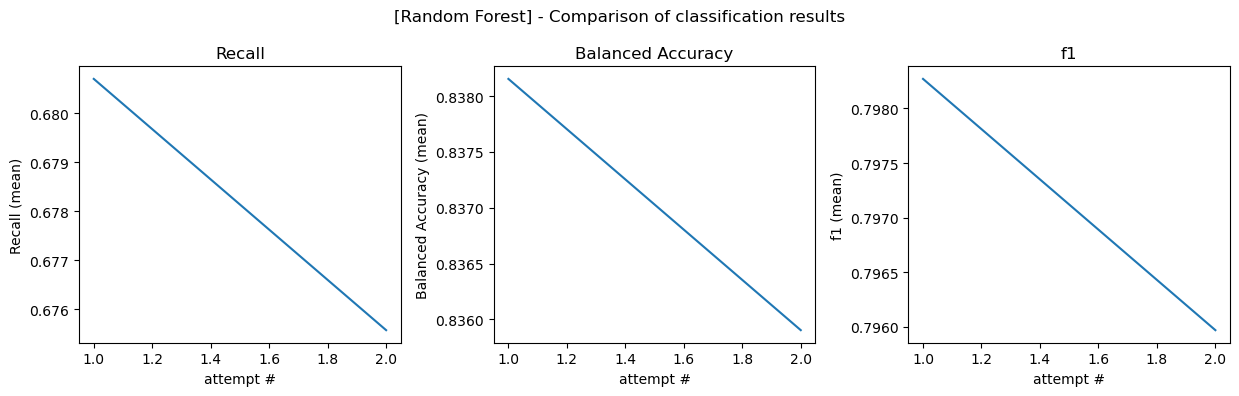

In [ ]:
plot_grid_results(out_rf, 'Random Forest')